In [2]:
# upload an image to work on
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())


files = upload_files()

# just consider the first file = 1st image
image = files[0]

Saving 25360380_1a881a5648.jpg to 25360380_1a881a5648.jpg


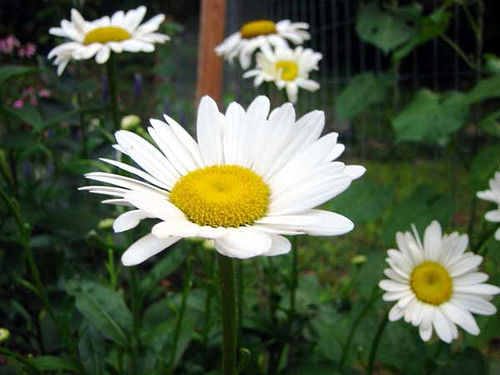

In [6]:
from IPython.display import Image, display
import PIL.Image

# show uploaded image
display(Image(image))

# open the image with PIL or pillow to optimize it with numpy
imagePil = PIL.Image.open(image)

iVBORw0KGgoAAAANSUhEUgAAAfQAAAF3CAIAAADckC6rAAEAAElEQVR4nKT9aZMkR5IlCD5mFlFVO/yKGwEgcGQCCeRdWV3b1Us03TNUS0v7w6d2pqe7qqd7OiuzEnnhPuPwww5VEWbeD6yqbu4RyM6hVQI5LNzN1FRVRJ7w8fgxrVen7g7A3c1sfk1ERATg1k8icvf5zXEAMLPxDexEBFh85PDwg4NIUkrtolkul82iERFVLToMm51arbUClhKnzCIMwInn72JmZp7On4ruC5Qa5kRMSShlTqk56rpuuVwS4fz8/OLiommas7Oze6dHOWcYXV5enj87v7q6GvZDrVVAALtT3BpQicFsRnHXQhB31FpL0VKKmwAMJyIBABjIp7s2h7prXDWRE/lmu47bYSaQASZCkki1zg8qbqqUst/vhbucFsINkNzAzO6uqu7uMGgFVWFnMffqWiR3MWJmVnUwMyInIh9i0OjgiQGAmRIRs4gIM5tCVVU15zbeycyHs0JVD0fwcFjNLEY/fjZN03XdO116dP/+vTvHd48Wd9ZdIqv9luFldxXDx9PJ4EpETktPZKJsKtUB3qhfWnmxT5uhng9+XnFVuSqSNE3TKAnIXU2H3q2Sq2ot/VBgRGRmpRR3j3sxMxF5+crjT4eTc55dZhZPIB6Lu6eUUkq1ViKqtQ7DYGYpJREhIlXt+77WGm+j6fCq+zKYWc45N42IOBMz7/f7YRiGYYgn1jRNfCq+btjt+74noOu6rusyy6A1RmH8lHvKOed8fHw8X/8wDLvdrtYad01EKaU4+Tx/9vt9rXV+MrHSmZlJJDEzzOowDH1fajVXl5TMlciZAapEaNrUdY3vAabxkkoxMyMws4Pj64qpu0tOTdOICAm01Lh4rdXdEzERsQ5J2lLdDKlNkiqn0i3TerXKORPR0OvQY+i931u/1/5qIDgTkzARnOCuAJzJXYm1aXLbtim1bqLq2+3FPGk5AApCROZ1HCFI

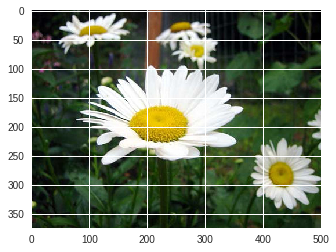

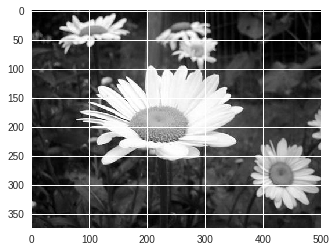

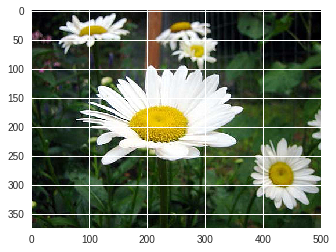

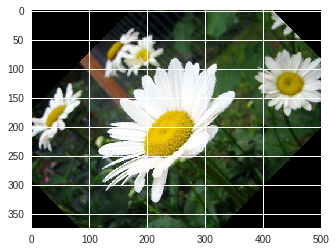

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
# randomize image turning it or changing colors, intensity ecc

# grayscale
imgGrey = imagePil.convert('LA')

# image enchancing
from PIL import ImageEnhance
enhancer = ImageEnhance.Sharpness(imagePil)


# rotate image
img45 = imagePil.rotate(45)
img90 = imagePil.rotate(90)
imgl45 = imagePil.rotate(-45)


# convert image to base64 format
def encode_img(img_fn):
  import base64
  in_mem_file = io.BytesIO()
  img_fn.save(in_mem_file, format = "PNG")
  # reset file pointer to start
  in_mem_file.seek(0)
  img_bytes = in_mem_file.read()

  base64_encoded_result_bytes = base64.b64encode(img_bytes)
  base64_encoded_result_str = base64_encoded_result_bytes.decode('ascii')
  return base64_encoded_result_str
  
# print base image format base64
print(encode_img(imagePil))

# display the other images
plt.figure()
plt.imshow(imagePil) # original

plt.figure()
plt.imshow(imgGrey) # grayscale

plt.figure()
plt.imshow(enhancer.enhance(2.0)) # enhanced

plt.figure()
plt.imshow(img45) # rotated

In [0]:
# use simple GAN api


In [0]:
# customvision API ? 